# Boston Housing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
boston_df=pd.read_csv('Boston.csv')
boston_df=boston_df.drop(columns=boston_df.columns[0],axis=1)
boston_df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [13]:
boston_df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
black      float64
lstat      float64
medv       float64
dtype: object

In [14]:
boston_df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [16]:
boston_df.isnull().sum()
#no null data

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [17]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


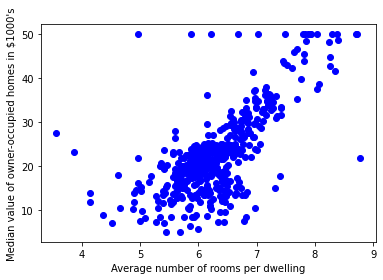

In [9]:
plt.scatter(boston_df.rm,boston_df.medv,color='BLUE')
plt.xlabel('Average number of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes in $1000\'s')
plt.show()

## Using Multiple Linear Regression

Manual selection of features.

In [31]:
mask=np.random.rand(len(boston_df))<0.85
test_data=boston_df[~mask]
train_data=boston_df[mask]

In [32]:
from sklearn.linear_model import LinearRegression
regr=LinearRegression()

X=np.asanyarray(train_data[['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'lstat']])
y=np.asanyarray(train_data[['medv']])

regr.fit(X,y)

print(f'Coefficients : {regr.coef_}')

Coefficients : [[-1.20794904e-01  7.93280623e-02  3.37518922e-04 -1.19498761e+01
   4.12114415e+00  8.76020601e-03 -1.70032378e+00  2.41227300e-01
  -1.69680959e-02 -6.10435433e-01]]


In [33]:
prediction=regr.predict(test_data[['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'lstat']])

X=np.asanyarray(test_data[['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'lstat']])
y=np.asanyarray(test_data[['medv']])

print(f'Variance Score: {regr.score(X,y)}')

Variance Score: 0.7660248734912543


Using train_test_split function

In [55]:
from sklearn.model_selection import train_test_split

X=np.asanyarray(boston_df[['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'lstat']])
y=np.asanyarray(boston_df[['medv']])

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

print(f'Train Dataset Size X : {X_train.shape}   y : {y_train.shape}')
print(f'Test Dataset Size X : {X_test.shape}   y : {y_test.shape}')

Train Dataset Size X : (404, 10)   y : (404, 1)
Test Dataset Size X : (102, 10)   y : (102, 1)


In [56]:
regr.fit(X,y)

predcition2=regr.predict(X_test)

print(f'Variance score: {regr.score(X_test,y_test)}')

Variance score: 0.7915915584994067


## Using Linear Regression and Correlation Matrix

Features are selected using correlation matrix